# Practical Machine Learning
## Supervised Learning

by Sven Mayer
### References
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
* https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_versus_svm_iris.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-versus-svm-iris-py
* https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html

## Classificaion

In [139]:
# Scikit-learn, see https://scikit-learn.org
import sklearn
import sklearn.svm
import sklearn.datasets

# Math operations
import numpy as np

# Drawing functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


Creating two clusters with random points on a 2D plain grouped in two classes

In [140]:
number_of_samples = [500, 500]
centers = [[0.0, 0.0], [3.0, 3.0]]
clusters_std = [1.5, 0.5]
x, y = sklearn.datasets.make_blobs(n_samples=number_of_samples, centers=centers,
                                   cluster_std=clusters_std, shuffle=True,
                                   random_state=0)

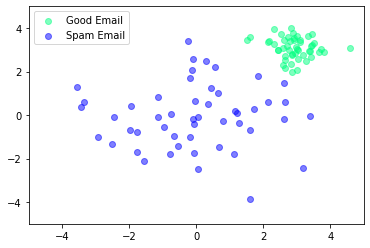

In [4]:
i = 50

plt.scatter(x[y==1][:i, 0], x[y==1][:i, 1], alpha=0.5, c="#00ff80", label="Good Email")
plt.scatter(x[y==0][:i, 0], x[y==0][:i, 1], alpha=0.5, c="blue", label="Spam Email")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/04_email-cluster-050.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)

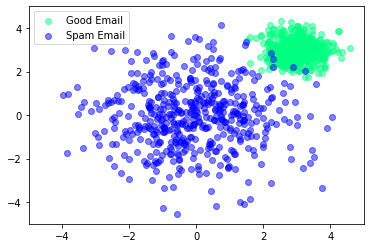

In [5]:
i = 500

plt.scatter(x[y==1][:i, 0], x[y==1][:i, 1], alpha=0.5, c="#00ff80", label="Good Email")
plt.scatter(x[y==0][:i, 0], x[y==0][:i, 1], alpha=0.5, c="blue", label="Spam Email")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/04_email-cluster-500.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)

## Training the first linear SVM 

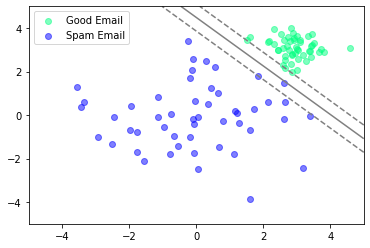

In [6]:
# use the first i samples
i = 50

#specify the SVMs parameter
classifier = sklearn.svm.SVC(C=10, gamma="scale", kernel="linear") #gamma=0.1 degree=3

# train the SVM
classifier.fit(x[:i], y[:i])

## plot the results
fig, ax = plt.subplots()


plt.scatter(x[y==1][:i, 0], x[y==1][:i, 1], alpha=0.5, c="#00ff80", label="Good Email")
plt.scatter(x[y==0][:i, 0], x[y==0][:i, 1], alpha=0.5, c="blue", label="Spam Email")


# calculate and plot decision boundary
xx = np.linspace(-5, 5, 30)
yy = np.linspace(-5, 5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='gray', levels=[-1, 0, 1],  linestyles=['--', '-', '--'])

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/04_email-svm-050-linear.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()


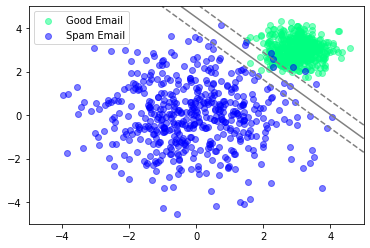

In [7]:
## plot the results
fig, ax = plt.subplots()

i = 500

plt.scatter(x[y==1][:i, 0], x[y==1][:i, 1], alpha=0.5, c="#00ff80", label="Good Email")
plt.scatter(x[y==0][:i, 0], x[y==0][:i, 1], alpha=0.5, c="blue", label="Spam Email")
#plt.scatter(X[:i, 0], X[:i, 1], c=y[:i], alpha=0.5, cmap="winter", label="Data points")


# calculate and plot decision boundary
xx = np.linspace(-5, 5, 30)
yy = np.linspace(-5, 5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='gray', levels=[-1, 0, 1],  linestyles=['--', '-', '--'])
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/04_email-svm-500-linear.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()


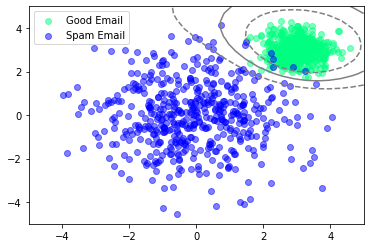

In [67]:
# use the first i samples
i = 500

#specify the SVMs parameter
classifier = sklearn.svm.SVC(C=10, gamma="scale", kernel="rbf") #gamma=0.1 degree=3

# train the SVM
classifier.fit(x[:i], y[:i])

## plot the results
fig, ax = plt.subplots()


plt.scatter(x[y==1][:i, 0], x[y==1][:i, 1], alpha=0.5, c="#00ff80", label="Good Email")
plt.scatter(x[y==0][:i, 0], x[y==0][:i, 1], alpha=0.5, c="blue", label="Spam Email")


# calculate and plot decision boundary
xx = np.linspace(-5, 5, 30)
yy = np.linspace(-5, 5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='gray', levels=[-1, 0, 1],  linestyles=['--', '-', '--'])

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/04_email-svm-500-rbf.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()


## Taining the SVM with more and more data points - Animation 

In [12]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

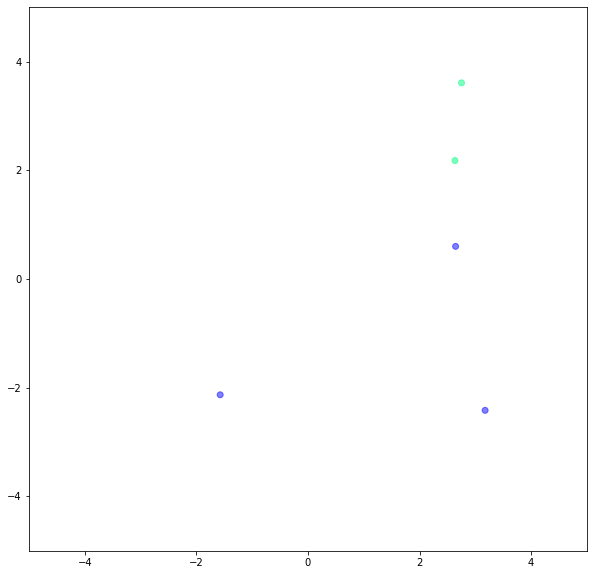

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
def init():
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    scatter = ax.scatter(x[:5, 0], x[:5, 1], c=y[:5], alpha=0.5, cmap="winter", label="Data points")

    return scatter, 

def update(i):
    ax.clear()
    ax.set_title("%i data points" % i)
    classifier = sklearn.svm.SVC(C=10, gamma="scale", kernel="linear") #gamma=0.1 degree=3
    classifier.fit(x[:i], y[:i])
    
    scatter = ax.scatter(x[:i, 0], x[:i, 1], c=y[:i], alpha=0.5, cmap="winter", label="Data points")

    
    # create grid to evaluate model
    xx = np.linspace(-5, 5, 30)
    yy = np.linspace(-5, 5, 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='gray', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    return scatter,

anim = FuncAnimation(fig, update, frames=np.arange(5, 500), init_func=init, blit=True)


In [16]:
HTML(anim.to_html5_video())


## Regression

In [21]:
# Emails on a 2D space

array([[-1.57282945, -2.13002691],
       [ 2.64607852,  0.60023581],
       [ 2.75210225,  3.60828886],
       ...,
       [ 3.30355584,  2.4759148 ],
       [ 3.81579871,  3.18887958],
       [ 2.51379856,  3.67311054]])

In [84]:
# Likelyhood of them being spam 0-1
np.random.seed(0)
y1 = (x[:,0] - np.min(x[:,0]))/ max(x[:,0]) * (x[:,1] - np.min(x[:,1]))/ max(x[:,1]) + np.random.random(len(y1))*2
y1 = (y1 - np.min(y1))/ max(y1)

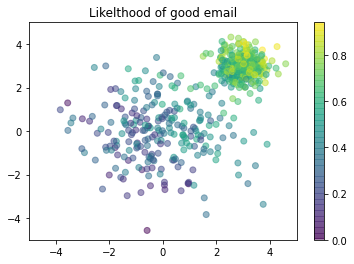

In [85]:

fig, ax = plt.subplots()
plt.title("Likelthood of good email")
plt.scatter(x[:i, 0], x[:i, 1], alpha=0.5, c=y1[:i], label="Email")
plt.colorbar()
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.savefig("./figures/04_email-regression-500.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

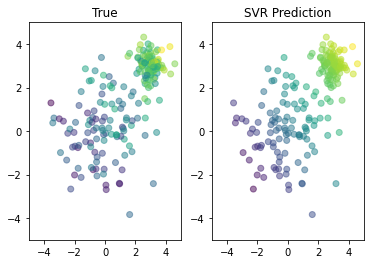

In [159]:

svr = sklearn.svm.SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1)
svr = svr.fit(x, y1)
y2 = svr.predict(x)

fig, ax = plt.subplots(1, 2)
ax[0].set_title("True")
ax[0].scatter(x[:i, 0], x[:i, 1], alpha=0.5, c=y1[:i], label="Email")


sc = ax[1].scatter(x[:i, 0], x[:i, 1], alpha=0.5, c=y2[:i], label="Email")
ax[1].set_title("SVR Prediction")


#plt.colorbar(sc)
for j in [0,1]:
    ax[j].set_xlim(-5,5)
    ax[j].set_ylim(-5,5)
plt.savefig("./figures/04_email-regression-500-SVR.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

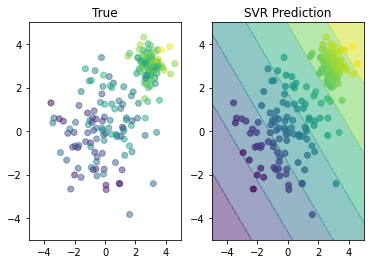

In [166]:

svr = sklearn.svm.SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1)
svr = svr.fit(x, y1)
y2 = svr.predict(x)

fig, ax = plt.subplots(1, 2)
ax[0].set_title("True")
ax[0].scatter(x[:i, 0], x[:i, 1], alpha=0.5, c=y1[:i], label="Email")


# plot the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))

Z = svr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the line, the points, and the nearest vectors to the plane
ax[1].contourf(xx, yy, Z, alpha=0.5)


sc = ax[1].scatter(x[:i, 0], x[:i, 1], alpha=0.75, c=y2[:i], label="Email")
ax[1].set_title("SVR Prediction")


#plt.colorbar(sc)
for j in [0,1]:
    ax[j].set_xlim(-5,5)
    ax[j].set_ylim(-5,5)
plt.savefig("./figures/04_email-regression-500-SVR-gradient.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

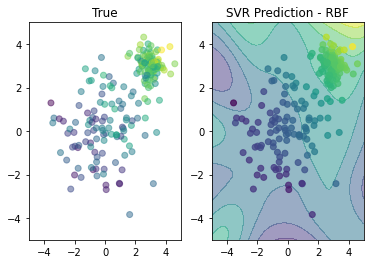

In [171]:

svr = sklearn.svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr = svr.fit(x, y1)
y2 = svr.predict(x)

fig, ax = plt.subplots(1, 2)
ax[0].set_title("True")
ax[0].scatter(x[:i, 0], x[:i, 1], alpha=0.5, c=y1[:i], label="Email")


# plot the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))

Z = svr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the line, the points, and the nearest vectors to the plane
ax[1].contourf(xx, yy, Z, alpha=0.5)


sc = ax[1].scatter(x[:i, 0], x[:i, 1], alpha=0.75, c=y2[:i], label="Email")
ax[1].set_title("SVR Prediction - RBF")


#plt.colorbar(sc)
for j in [0,1]:
    ax[j].set_xlim(-5,5)
    ax[j].set_ylim(-5,5)
plt.savefig("./figures/04_email-regression-500-SVR-gradient-rbf.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()